<a href="https://colab.research.google.com/github/varunbommagunta/Visualizing-FeatureMaps/blob/main/Visualizing_The_Feature_Maps_In_CNN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.7MB/s]
 97% 262M/271M [00:03<00:00, 85.6MB/s]
100% 271M/271M [00:03<00:00, 76.1MB/s]
 96% 522M/543M [00:04<00:00, 144MB/s]
100% 543M/543M [00:04<00:00, 136MB/s]


In [ ]:
import os

In [ ]:
os.listdir("../content")

['.config',
 'train.zip',
 'test1.zip',
 '.ipynb_checkpoints',
 'sampleSubmission.csv',
 'kaggle.json',
 'sample_data']

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("../content/train.zip") as zip:
    zip.extractall()
    print("Done extracting the training data")
    
with zipfile.ZipFile("../content/test1.zip") as zip:
    zip.extractall()
    print("Done extracting the testing data")

Done extracting the training data
Done extracting the testing data


In [ ]:
zip.close()

In [ ]:
del zip

In [ ]:
zip

zip

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
files = os.listdir("../content/train")
labels = []
for file in files:
    category = file.split(".")[0]
    if category == 'dog':
        labels.append(1)
    else:
        labels.append(0)
        
df = pd.DataFrame({
    'filename':files,
    'label':labels
})

In [ ]:
df.head()

,filename,label
0,dog.1086.jpg,1
1,cat.324.jpg,0
2,cat.11513.jpg,0
3,dog.5610.jpg,1
4,dog.4601.jpg,1


In [ ]:
df.tail()

,filename,label
24995,cat.436.jpg,0
24996,dog.6342.jpg,1
24997,dog.7749.jpg,1
24998,dog.5937.jpg,1
24999,dog.1282.jpg,1


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['label'].value_counts()

1    12500
0    12500
Name: label, dtype: int64

In [ ]:
from keras.preprocessing.image import load_img
import cv2

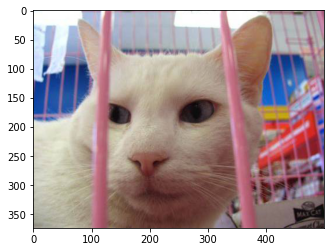

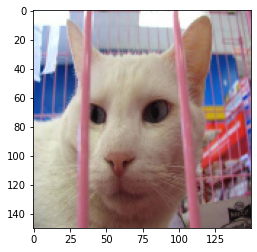

In [ ]:
sample = np.random.choice(files)
img = load_img("./train/"+sample)
np_img = np.asarray(img)
img = cv2.resize(np_img,(150,150))
plt.imshow(np_img)
plt.show()

plt.imshow(img)
plt.show()

In [ ]:
from keras.models import Sequential
import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape = (150,150,3),activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(256,(3,3),activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
    
    
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [ ]:
df.head()

,filename,label
0,dog.1086.jpg,1
1,cat.324.jpg,0
2,cat.11513.jpg,0
3,dog.5610.jpg,1
4,dog.4601.jpg,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['label'] = df['label'].replace({0:'cat',1:'dog'})

In [ ]:
train_df,validate_df = train_test_split(df,test_size = 0.20,random_state = 42)

In [ ]:
validate_df['label'].value_counts()

cat    2514
dog    2486
Name: label, dtype: int64

In [ ]:
train_df.head()

,filename,label
23311,cat.5160.jpg,cat
23623,cat.3368.jpg,cat
1020,cat.9634.jpg,cat
12645,dog.11723.jpg,dog
1533,cat.504.jpg,cat


In [ ]:
train_df = train_df.reset_index(drop=1)

In [ ]:
train_df.head()

,filename,label
0,cat.5160.jpg,cat
1,cat.3368.jpg,cat
2,cat.9634.jpg,cat
3,dog.11723.jpg,dog
4,cat.504.jpg,cat


In [ ]:
validate_df.head()

,filename,label
6868,cat.4193.jpg,cat
24016,dog.9575.jpg,dog
9668,cat.235.jpg,cat
13640,cat.4010.jpg,cat
14018,cat.9323.jpg,cat


In [ ]:
validate_df = validate_df.reset_index(drop=1)

In [ ]:
validate_df.head()

,filename,label
0,cat.4193.jpg,cat
1,dog.9575.jpg,dog
2,cat.235.jpg,cat
3,cat.4010.jpg,cat
4,cat.9323.jpg,cat


In [ ]:
#Training Generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
            rescale = 1.0/255.0,
            rotation_range = 44,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            height_shift_range = 0.2,
            width_shift_range = 0.2
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
            train_df,
            "./train",
            x_col = 'filename',
            y_col = 'label',
            target_size = (150,150),
            class_mode = 'binary',
            batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
#Validation Generator

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
            validate_df,
            "./train",
            x_col = 'filename',
            y_col = 'label',
            target_size = (150,150),
            class_mode = 'binary',
            batch_size = 32)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [ ]:
import tensorflow as tf

In [ ]:
with tf.device("gpu:0"):
   print("tf.keras code in this scope will run on GPU")

tf.keras code in this scope will run on GPU


In [ ]:
#Training our model
history = model.fit(
            train_generator,
            epochs = 16,
            validation_data = validation_generator,
            steps_per_epoch = total_train/batch_size,
            validation_steps = total_validate/batch_size)

Epoch 1/16
625/625 [==============================] - 193s 256ms/step - loss: 0.8128 - accuracy: 0.5533 - val_loss: 0.6535 - val_accuracy: 0.6348
Epoch 2/16
625/625 [==============================] - 157s 252ms/step - loss: 0.6615 - accuracy: 0.6201 - val_loss: 0.6666 - val_accuracy: 0.5922
Epoch 3/16
625/625 [==============================] - 160s 256ms/step - loss: 0.6249 - accuracy: 0.6689 - val_loss: 0.6701 - val_accuracy: 0.5948
Epoch 4/16
625/625 [==============================] - 161s 257ms/step - loss: 0.5852 - accuracy: 0.7032 - val_loss: 0.6654 - val_accuracy: 0.6536
Epoch 5/16
625/625 [==============================] - 160s 256ms/step - loss: 0.5251 - accuracy: 0.7534 - val_loss: 0.5404 - val_accuracy: 0.7456
Epoch 6/16
625/625 [==============================] - 159s 255ms/step - loss: 0.4730 - accuracy: 0.7860 - val_loss: 0.4748 - val_accuracy: 0.7742
Epoch 7/16
625/625 [==============================] - 159s 255ms/step - loss: 0.4177 - accuracy: 0.8199 - val_loss: 0.3529 -

In [ ]:
model.save('My_Model')  #Save the model so that you don't have to train the model again.

In [2]:
from keras.models import load_model

In [3]:
model = load_model('/content/drive/MyDrive/DataSets/My_Model') #Load the model from the directory where you have saved it

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [13]:
import numpy as np  #For numerical processing
from tensorflow.keras.preprocessing.image import img_to_array,load_img #For loading image and convering image to specified type
import matplotlib.pyplot as plt #For plotting 
import keras

In [7]:
model.layers  #List of the layers used in our model

In [8]:
layer_outputs = [layer.output for layer in model.layers] #outputs of each layer

In [15]:
viz_model = keras.models.Model(inputs = model.input,outputs = layer_outputs)  #Create a model that gives the featuremaps as outputs in every layer

In [16]:
img = load_img('/content/golder-retriever-puppy.jpeg',target_size=(150,150))  #load the image and convert it to the specified size

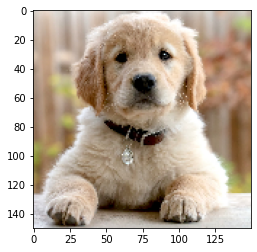

In [17]:
plt.imshow(img);

In [18]:
x = img_to_array(img)

In [19]:
x.shape

(150, 150, 3)

In [20]:
x = x.reshape(1,150,150,3)

In [21]:
x.shape  #Actually the shape is (150,150,3) but our model accepts the image of size (1,150,150,3) here the 0th index refers to the batch size

(1, 150, 150, 3)

In [22]:
x = x/255.0  #Normalize the image in the range of 0 to 1

In [23]:
feature_maps = viz_model.predict(x) #Get the outputs of the given image

In [24]:
len(feature_maps) #16 because we have 16 layers however we omit the Dense layers for visualization

16

In [25]:
layer_names = [layer.name for layer in model.layers]  

In [26]:
layer_names

['conv2d',
 'batch_normalization',
 'max_pooling2d',
 'conv2d_1',
 'batch_normalization_1',
 'max_pooling2d_1',
 'conv2d_2',
 'batch_normalization_2',
 'max_pooling2d_2',
 'conv2d_3',
 'batch_normalization_3',
 'max_pooling2d_3',
 'flatten',
 'dense',
 'dense_1',
 'dense_2']

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Plotting the graph
l = []
for layer_names, feature_maps in zip(layer_names,feature_maps):
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    k = []
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      k.append(x)
    l.append(k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


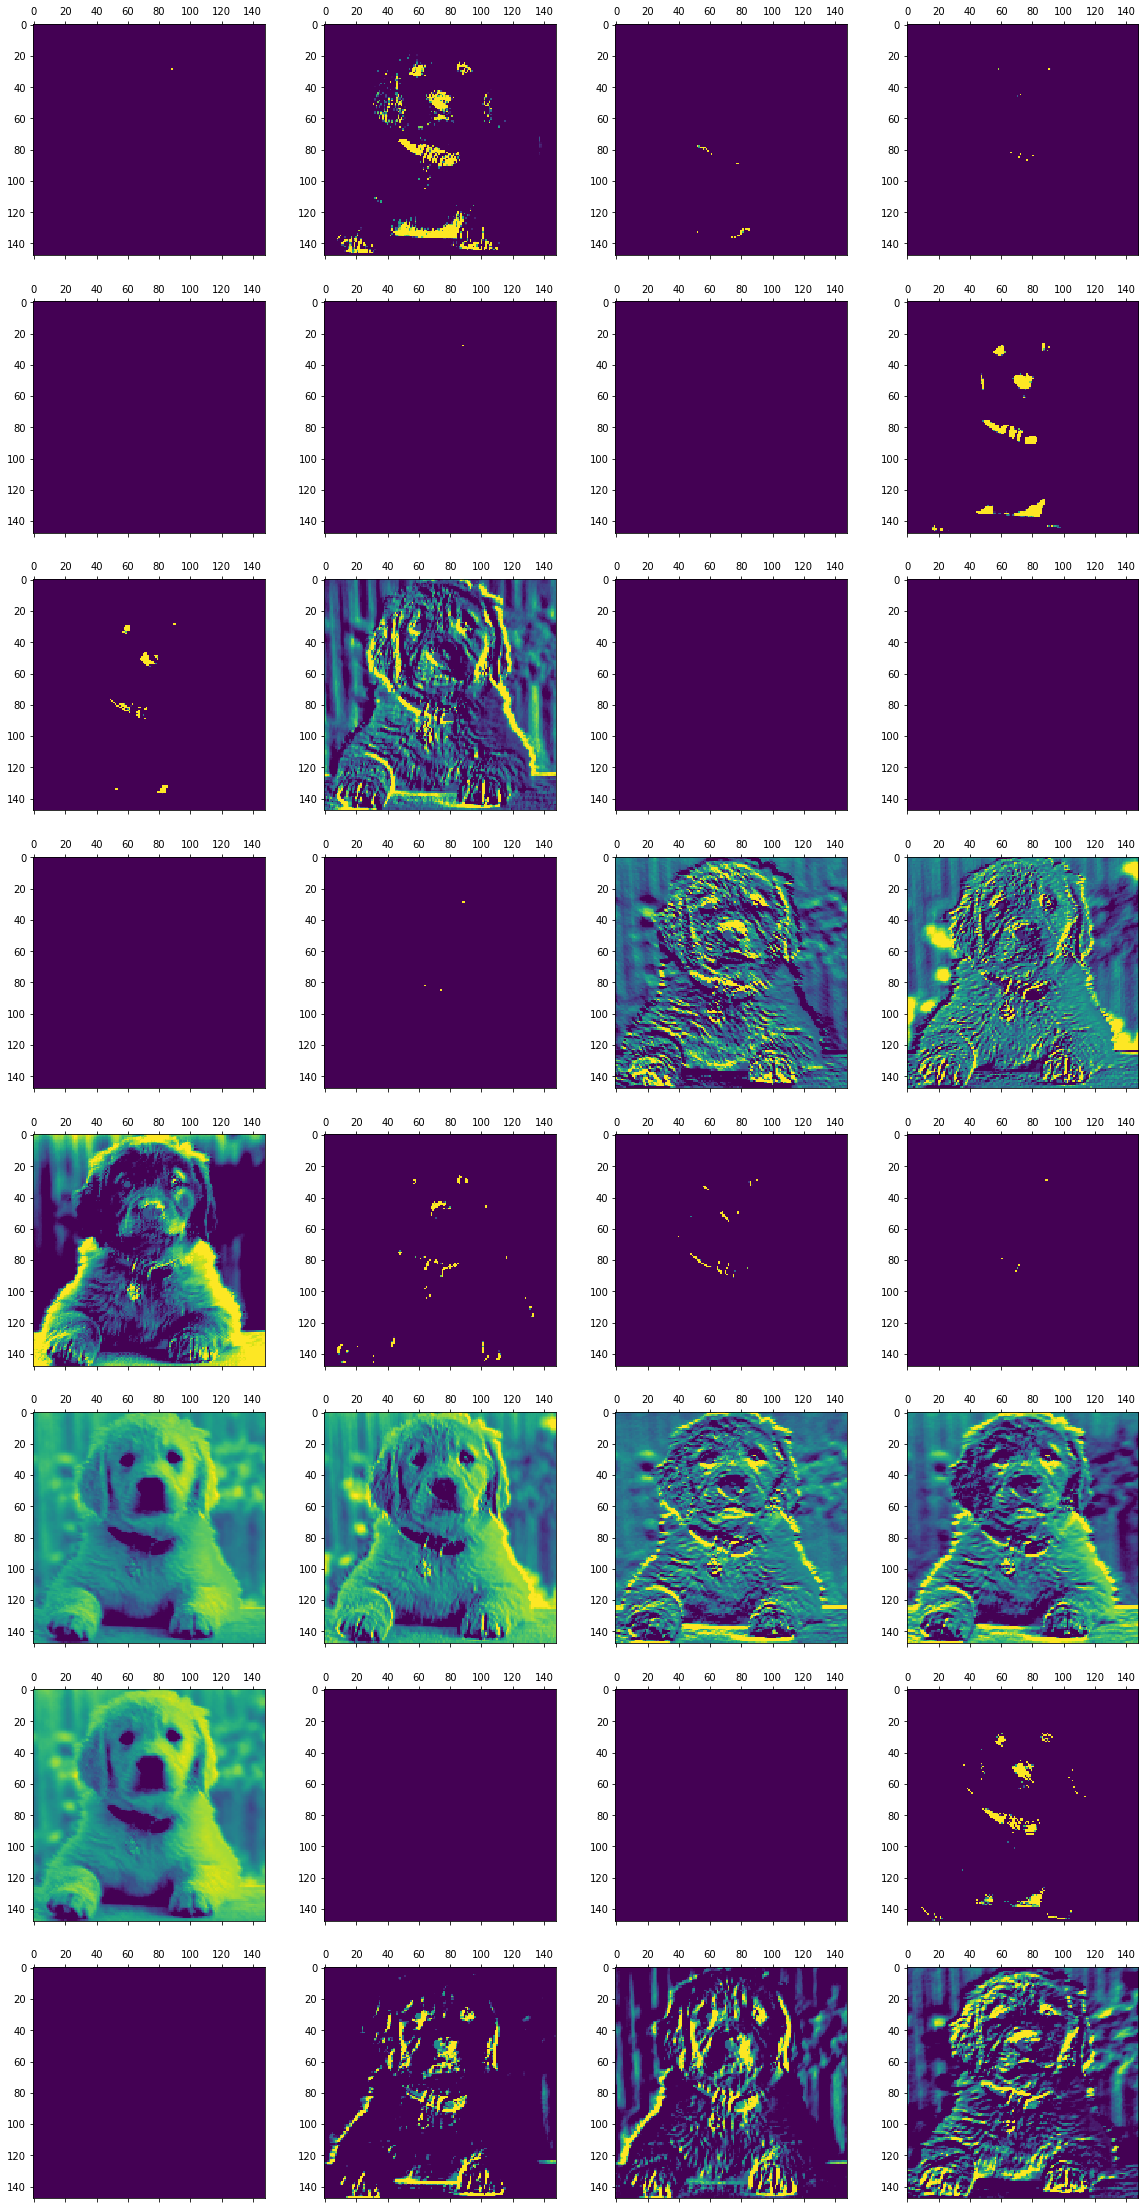

In [33]:
fig,axes = plt.subplots(8,4,figsize = (20,40))  #In the first layer output we have 32 filters and we are plotting them in a 8x4 grid
k = 0
layer = 0
for i in range(8):
  for j in range(4):
    axes[i,j].matshow(l[layer][k])
    k+=1
plt.show()

In [ ]:
#In the above cell, we are visualizing only the first conv2d layer if you want to visualize other intermediate layers then change the hyperparameter 'layer' to your desired layer
#Also change the columns and rows in the subplot to the layer's channels to visualize in a grid.